<a href="https://colab.research.google.com/github/kharadevaibhav/Data-Analytics-Tasks/blob/main/E_commerce_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data analytics/ecommerce_price_analysis_dataset.csv")

In [ ]:
# Inspecting the Data
print(df.head())
print(df.info())

  product_id                      product_name     category sub_category  \
0     P00000   Realigned asynchronous attitude  Electronics   Smartphone   
1     P00001     Advanced needs-based database  Electronics       Camera   
2     P00002     Inverse non-volatile capacity      Fashion        Jeans   
3     P00003  Proactive asynchronous workforce      Grocery       Bakery   
4     P00004        Distributed hybrid archive         Home     Cookware   

        brand     price  discount_percent  final_price  rating  num_reviews  \
0   TrendZone  18789.55             57.29      8025.02     3.9         3772   
1    NovaTech   7884.13              8.19      7238.42     4.5         3171   
2   EliteCorp   1127.17             58.35       469.47     4.3         2433   
3    HomeBase  30621.49              5.39     28970.99     1.1          474   
4  UrbanStyle  49163.22             30.67     34084.86     4.4          646   

   availability  date_added seller_type   location is_returnable  \


In [ ]:
# Check and remove duplicates
print(f"Initial shape: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"After removing duplicates: {df.shape}")

Initial shape: (10000, 17)
After removing duplicates: (10000, 17)


In [ ]:
df

,product_id,product_name,category,sub_category,brand,price,discount_percent,final_price,rating,num_reviews,availability,date_added,seller_type,location,is_returnable,shipping_days,return_rate
0,P00000,Realigned asynchronous attitude,Electronics,Smartphone,TrendZone,18789.55,57.29,8025.02,3.9,3772,Out of stock,2024-02-19,Commercial,Hyderabad,Yes,5,3.12
1,P00001,Advanced needs-based database,Electronics,Camera,NovaTech,7884.13,8.19,7238.42,4.5,3171,Out of stock,2024-04-25,Commercial,Mumbai,Yes,8,14.16
2,P00002,Inverse non-volatile capacity,Fashion,Jeans,EliteCorp,1127.17,58.35,469.47,4.3,2433,In stock,2024-12-20,Commercial,Pune,Yes,5,12.35
3,P00003,Proactive asynchronous workforce,Grocery,Bakery,HomeBase,30621.49,5.39,28970.99,1.1,474,In stock,2023-11-25,Commercial,Pune,No,3,7.65
4,P00004,Distributed hybrid archive,Home,Cookware,UrbanStyle,49163.22,30.67,34084.86,4.4,646,Out of stock,2023-06-17,Commercial,Delhi,No,5,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P09995,Synergized coherent structure,Home,Furniture,NovaTech,11552.57,49.08,5882.57,4.3,3925,In stock,2024-06-24,Commercial,Mumbai,No,6,18.00
9996,P09996,Exclusive fault-tolerant approach,Fashion,Jackets,EliteCorp,19390.05,43.40,10974.77,3.3,3876,Out of stock,2023-04-04,Private,Bengaluru,Yes,6,9.68
9997,P09997,Cloned eco-centric solution,Home,Decor,HomeBase,47354.74,26.47,34819.94,1.9,3292,Out of stock,2022-08-19,Commercial,Kolkata,No,4,8.65
9998,P09998,Balanced maximized conglomeration,Electronics,Laptop,HomeBase,44084.79,30.55,30616.89,2.4,764,In stock,2025-04-05,Private,Delhi,No,7,4.81


In [ ]:
# Data Cleaning
# Checking for null values and their percentage
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
print(null_percentage)

product_id          0.0
product_name        0.0
category            0.0
sub_category        0.0
brand               0.0
price               0.0
discount_percent    0.0
final_price         0.0
rating              0.0
num_reviews         0.0
availability        0.0
date_added          0.0
seller_type         0.0
location            0.0
is_returnable       0.0
shipping_days       0.0
return_rate         0.0
dtype: float64


In [ ]:
df= df.sort_values(by='price')

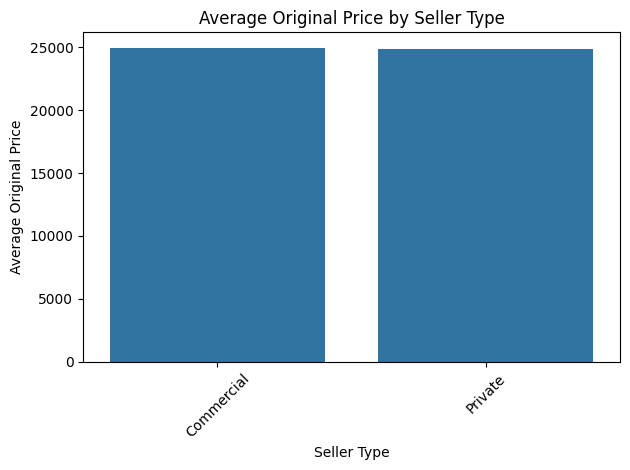

In [ ]:
# Grouping and calculating average original price
avg_price_per_seller = df.groupby('seller_type')['price'].mean().reset_index()

# Bar plot
sns.barplot(data=avg_price_per_seller, x='seller_type', y='price')
plt.title('Average Original Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Original Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

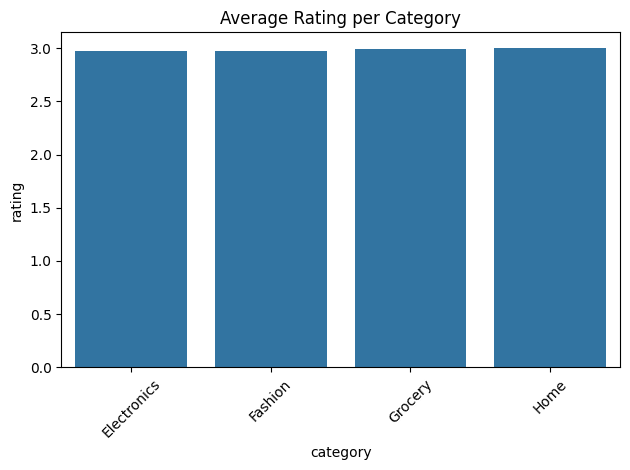

In [ ]:
category_ratings = df.groupby('category')['rating'].mean().reset_index()

import seaborn as sns
sns.barplot(data=category_ratings, x='category', y='rating')
plt.title('Average Rating per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

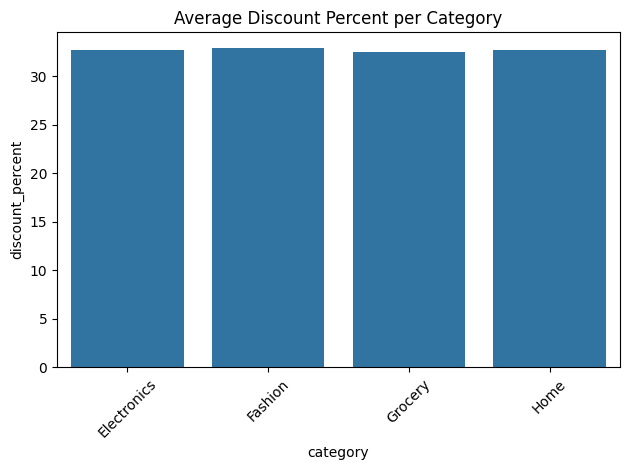

In [ ]:
category_discount = df.groupby('category')['discount_percent'].mean().reset_index()

sns.barplot(data=category_discount, x='category', y='discount_percent')
plt.title('Average Discount Percent per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

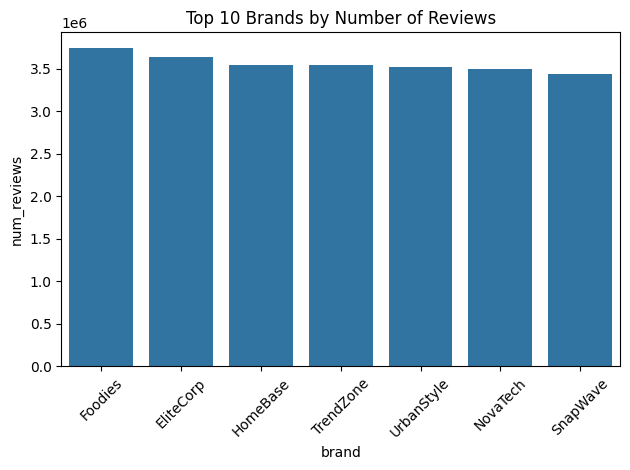

In [ ]:
brand_reviews = df.groupby('brand')['num_reviews'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=brand_reviews, x='brand', y='num_reviews')
plt.title('Top 10 Brands by Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

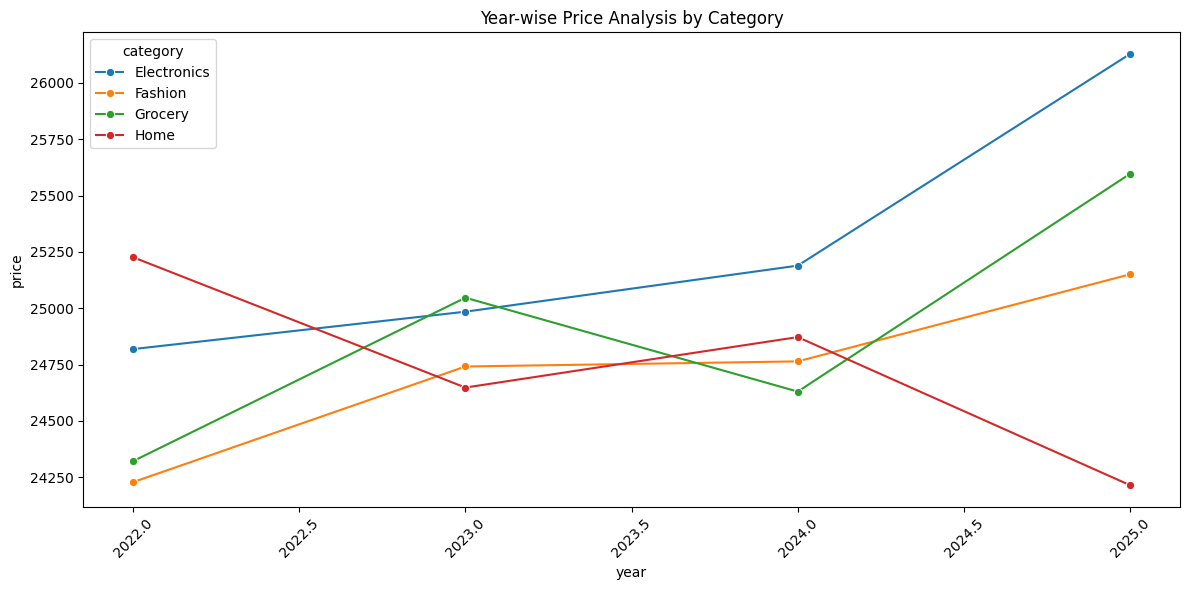

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year

year_category_price = df.groupby(['year', 'category'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_category_price, x='year', y='price', hue='category', marker='o')
plt.title('Year-wise Price Analysis by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

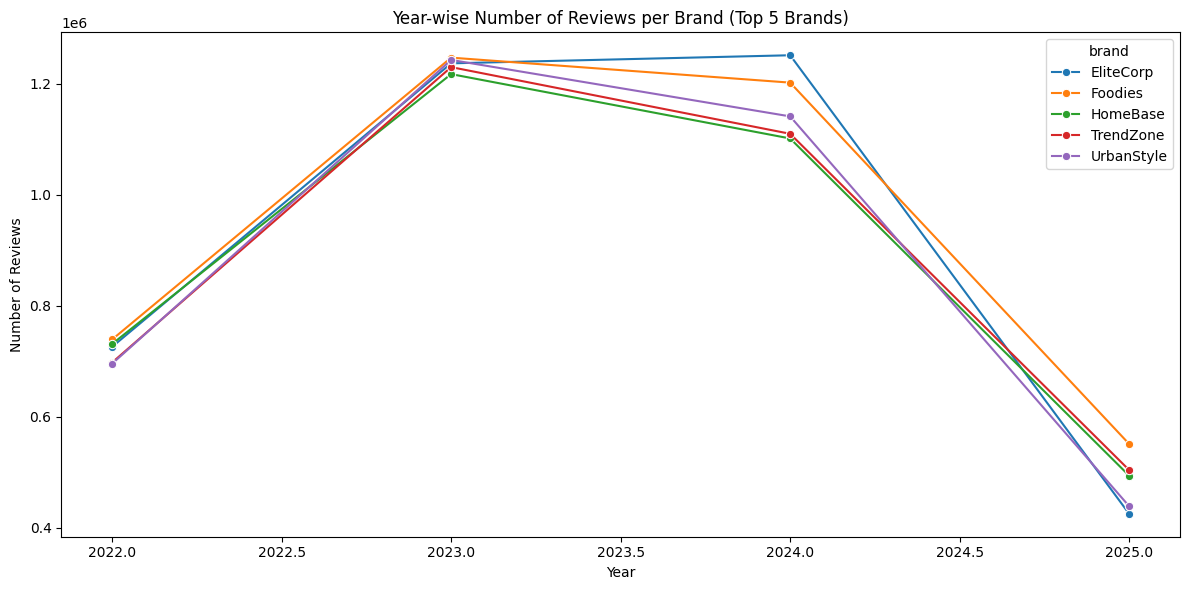

In [ ]:
# Group by year and brand, then sum reviews
year_brand_reviews = df.groupby(['year', 'brand'])['num_reviews'].sum().reset_index()

# Optional: Filter top 5 brands by total reviews
top_brands = df.groupby('brand')['num_reviews'].sum().nlargest(5).index
filtered_reviews = year_brand_reviews[year_brand_reviews['brand'].isin(top_brands)]

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_reviews, x='year', y='num_reviews', hue='brand', marker='o')
plt.title('Year-wise Number of Reviews per Brand (Top 5 Brands)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()